# prepare dataset for meom

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import crocosi.postp as pp

In [2]:
from dask.distributed import Client, LocalCluster
#
#cluster = LocalCluster()
#
from dask_jobqueue import PBSCluster
cluster = PBSCluster()
w = cluster.scale(jobs=2)
#
client = Client(cluster)
client

Client Scheduler: tcp://10.148.0.184:59962 Dashboard: http://10.148.0.184:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


---

## single run

In [9]:
#root_path = '/home/datawork-lops-osi/equinox/jetn/tmp/jetn/'
root_path = '/home/datawork-lops-osi/equinox/jetn/'
#run = 'jet_cfg1_wp5_4km_500a1000j'
#run = 'jet_cfg1_wp5_m1a1_4km_500a1000j/'
run = 'jet_cfg1_wp6_4km_500a1000j/'
#run = 'jet_cfg1_wp6_m1a1_4km_500a1000j/'

r = pp.Run(root_path+run, outputs=['surf'], verbose=True)
r['surf'] = r['surf'].assign_coords(time=r['surf'].time_instant.chunk({'time':None}))

Analysing directory /home/datawork-lops-osi/equinox/jetn/jet_cfg1_wp6_4km_500a1000j/
Found 5 segments
Search for parameters in croco.in :
Parameters detected in output.mpi :
Opening datasets: grid / surf
Grid size: (L ,M, N) = (258, 722, 50)


In [10]:
r['surf']

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time: 24000, x_rho: 258, x_u: 257, y_rho: 722, y_v: 721)
Coordinates:
  * x_u                  (x_u) float32 0.0 4000.0 8000.0 ... 1020000.0 1024000.0
  * y_rho                (y_rho) float32 -2000.0 2000.0 ... 2878000.0 2882000.0
  * y_v                  (y_v) float32 0.0 4000.0 8000.0 ... 2876000.0 2880000.0
    x_v                  (x_rho) float32 dask.array<chunksize=(258,), meta=np.ndarray>
  * x_rho                (x_rho) float32 -2000.0 2000.0 ... 1022000.0 1026000.0
    y_u                  (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    s_rho_slice0         float32 -0.01
    time_instant         (time) float64 dask.array<chunksize=(24000,), meta=np.ndarray>
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(2400, 2), meta=np.ndarray>
    time_counter         (time) float64 500.0 500.0 500.1 ... 1e+03 1e+03 1e+03
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(2400, 2), meta=np.ndarray>
    f_rho                (y_rho) float32 7.978978e-05 ... 0.00012647022
    f                    (y_rho) float32 7.978978e-05 ... 0.00012647022
  * time                 (time) float64 500.0 500.0 500.1 ... 1e+03 1e+03 1e+03
Dimensions without coordinates: axis_nbounds
Data variables:
    ssh                  (time, y_rho, x_rho) float32 dask.array<chunksize=(2400, 722, 258), meta=np.ndarray>
    T                    (time, y_rho, x_rho) float32 dask.array<chunksize=(2400, 722, 258), meta=np.ndarray>
    u                    (time, y_rho, x_u) float32 dask.array<chunksize=(2400, 722, 257), meta=np.ndarray>
    v                    (time, y_v, x_rho) float32 dask.array<chunksize=(2400, 721, 258), meta=np.ndarray>
    w                    (time, y_rho, x_rho) float32 dask.array<chunksize=(2400, 722, 258), meta=np.ndarray>
Attributes:
    name:         surf
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Apr-29 06:20:55 GMT
    uuid:         93ffb6ce-9d6d-40ec-8a1c-289272e9be4d

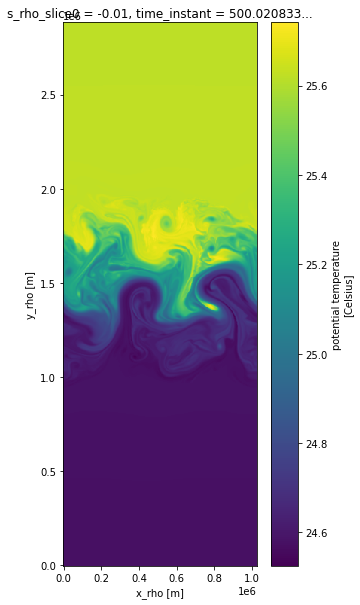

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,10))
r['surf'].T.isel(time=0).plot(ax=ax)
ax.set_aspect('equal', 'box')


In [12]:
ds = (r['surf']
      .drop('w')
      .isel(time=slice(0,200*24*6,6))
      .chunk({'time': 10})
     ).persist()

In [13]:
_to_delete = ['time_centered', 'time_centered_bounds', 
              'time_counter_bounds', 'time_instant_bounds']
for v in _to_delete:
    if v in ds:
        del ds[v]

In [8]:
r.store_diagnostic('surf_meom', ds, overwrite=True)

data stored in /home/datawork-lops-osi/equinox/jetn/jet_cfg1_wp6_m1a1_4km_500a1000j/diagnostics/surf_meom.zarr


In [14]:
r.store_diagnostic('surf_meom', ds, overwrite=True)

Create new diagnostic directory /home/datawork-lops-osi/equinox/jetn/jet_cfg1_wp6_4km_500a1000j/diagnostics/
data stored in /home/datawork-lops-osi/equinox/jetn/jet_cfg1_wp6_4km_500a1000j/diagnostics/surf_meom.zarr


In [49]:
r.store_diagnostic('surf_meom', ds, overwrite=True)

data stored in /home/datawork-lops-osi/equinox/jetn/tmp/jetn/jet_cfg1_wp5_4km_500a1000j/diagnostics/surf_meom.zarr


In [55]:
r.store_diagnostic('surf_meom', ds, overwrite=True)

data stored in /home/datawork-lops-osi/equinox/jetn/tmp/jetn/jet_cfg1_wp5_m1a1_4km_500a1000j/diagnostics/surf_meom.zarr


---

# params

In [50]:
print(r.params_input)
r.params_output

{'dt': 300.0, 'theta_s': 5.0, 'theta_b': 0.0, 'Hc': 100.0, 'rho0': 1000.0, 'rdrg': 0.00046, 'rdrg2': 0.0}


{'vtransform': 1,
 'itide_omega': 0.0001454441043,
 'itide_nmode': 2.0,
 'itide_Az': 0.0,
 'itide_y': 400000.0,
 'itide_start_time': 500.0,
 'itideptb_flag': 0.0,
 'itideptb_dcos': -1e-06,
 'itideptb_dsin': 0.0,
 'itideptb_nmode': 2.0,
 'itideptb_scale': 1.0,
 'jet_ywidth': 800000.0,
 'jet_weight': 0.5,
 'jet_decay_start': 500.0,
 'tdiag_omega': 0.0001454441043,
 'relax_dist_south': 1000000.0,
 'relax_L_south': 350000.0,
 'relax_tau_in_south': 1000.0,
 'relax_tau_out_south': 1.0,
 'relax_dist_north': 1000000.0,
 'relax_L_north': 350000.0,
 'relax_tau_in_north': 1000.0,
 'relax_tau_out_north': 1.0,
 'depth': 4000.0,
 'f0': 0.00010313,
 'beta': 1.6186e-11,
 'yrbeta': 1440000.0,
 'itideptb_truth_Acos_mode': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'itideptb_truth_Asin_mode': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'itideptb_full_Acos_mode': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'itideptb_full_Asin_mode': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

---

In [15]:
cluster.close()